In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
!pip install dabl

In [6]:
import dabl

In [7]:
# Reading data
data = pd.read_csv("/content/drive/My Drive/TP_STUDENTS_PERFORMANCE_ANALYSIS/StudentsPerformance.csv")
# 5 first lignes
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# 5 last lignes
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
# getting the shape of the data
print(data.shape)

(1000, 8)


In [10]:
data.info

<bound method DataFrame.info of      gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]>

In [11]:
#Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [12]:
# lets check the no. of unique items present in the categorical column
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [13]:
# lets check the percentage of missing data in each columns present in the data
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


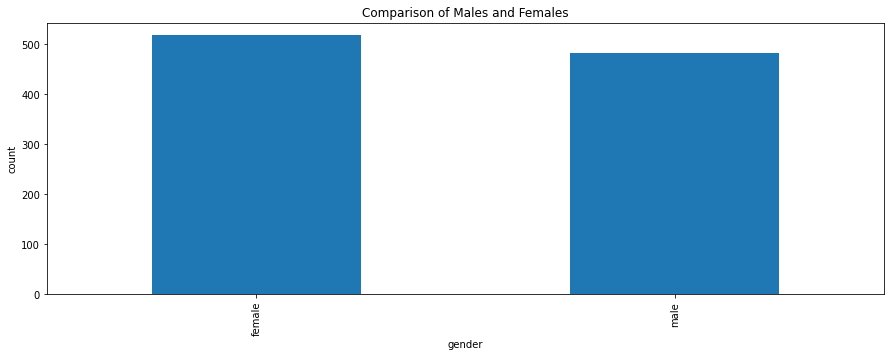

In [14]:
#Visualising the number of male and female in the dataset
plt.subplots(figsize=(15,5))
data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [15]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

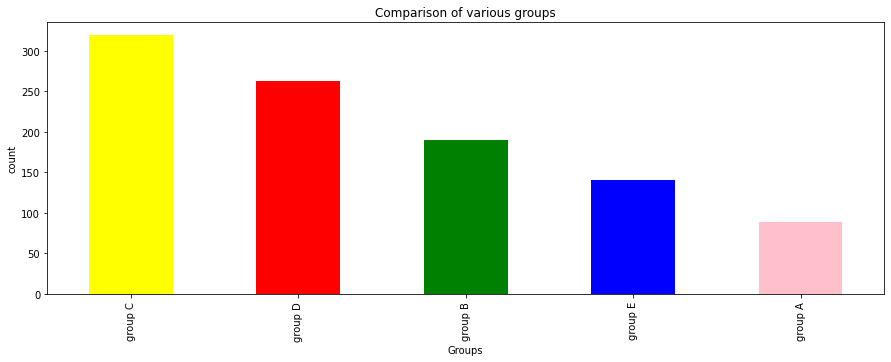

In [16]:
# Visualizing the different groups in the dataset
plt.subplots(figsize=(15,5))
data['race/ethnicity'].value_counts(normalize = True)
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color=['yellow', 'red', 'green', 'blue', 'pink'])
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

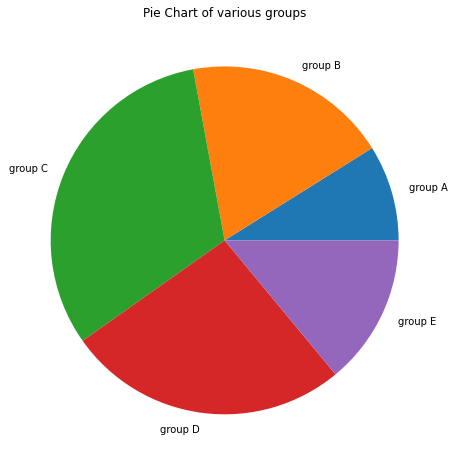

In [17]:
# Prepare Data
df = data.groupby('race/ethnicity').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of various groups")
plt.ylabel("")
plt.show()

In [18]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

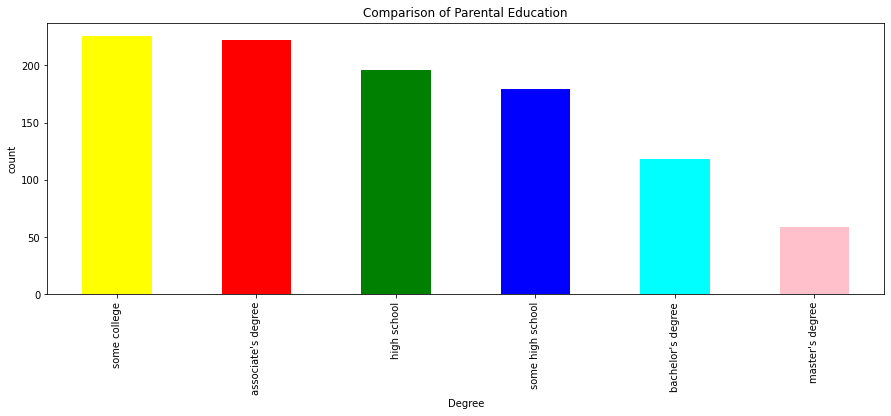

In [19]:
# visualizing the differnt parental education levels
plt.subplots(figsize=(15,5))
data['parental level of education'].value_counts(normalize = True)
data['parental level of education'].value_counts(dropna = False).plot.bar(color=['yellow', 'red', 'green', 'blue', 'cyan', 'pink'])
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

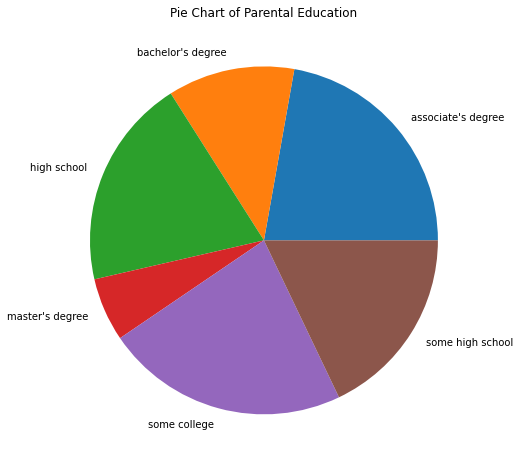

In [20]:
# Prepare Data
df = data.groupby('parental level of education').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of Parental Education")
plt.ylabel("")
plt.show()

In [21]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

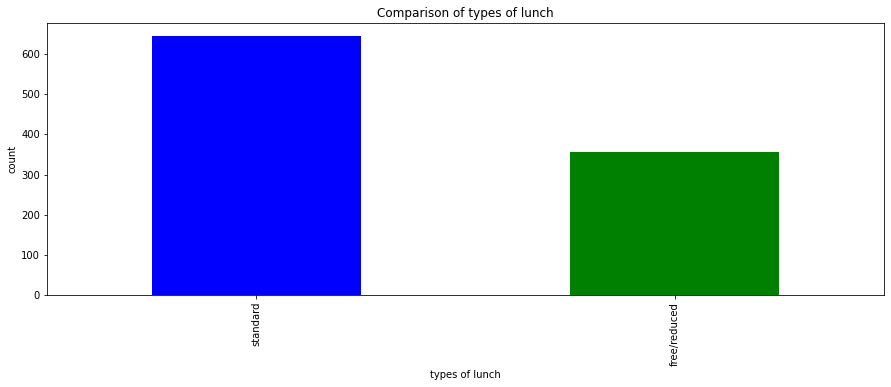

In [22]:
# visualizing the differnt types of lunch
plt.subplots(figsize=(15,5))
data['lunch'].value_counts(normalize = True)
data['lunch'].value_counts(dropna = False).plot.bar(color=['blue', 'green'])
plt.title('Comparison of types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

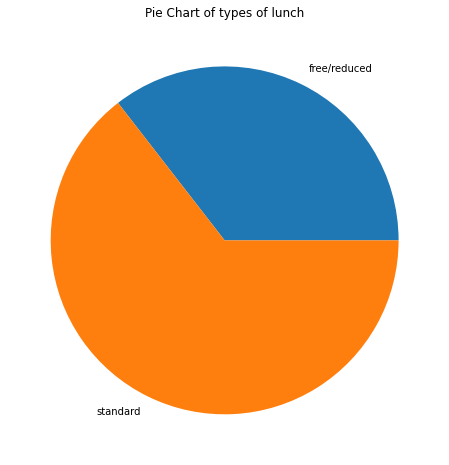

In [23]:
# Prepare Data
df = data.groupby('lunch').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of types of lunch")
plt.ylabel("")
plt.show()

Target looks like regression


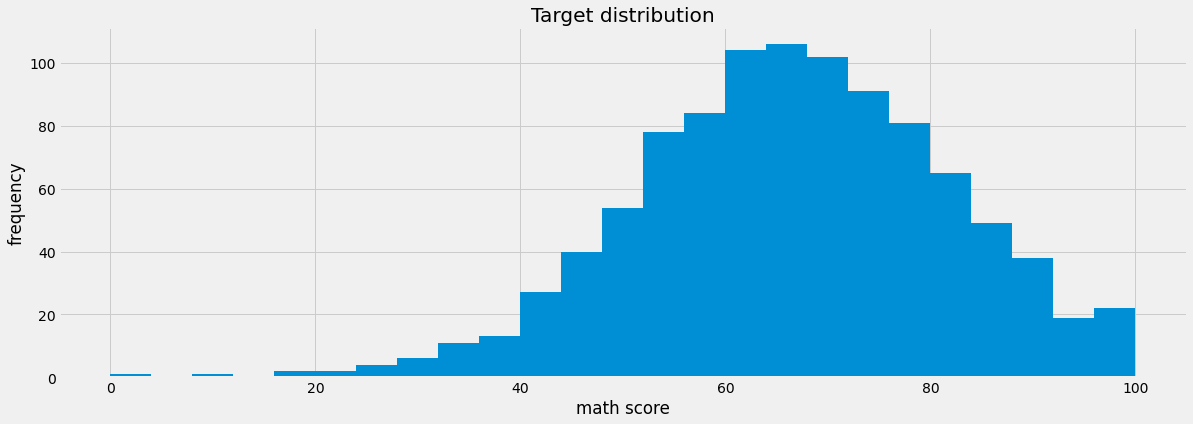

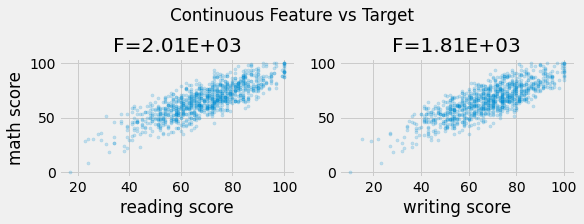

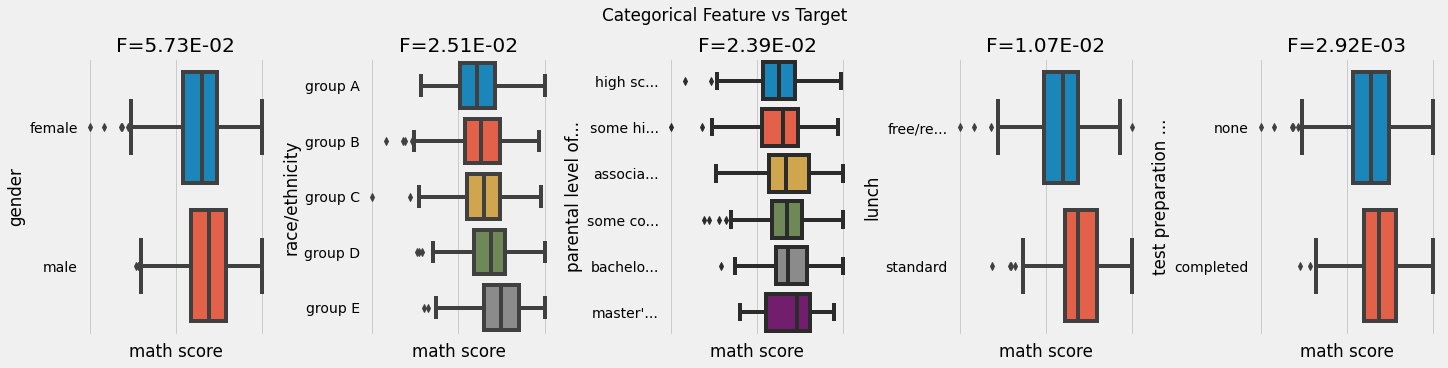

In [24]:
# comparison of all other attributes with respect to Math Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


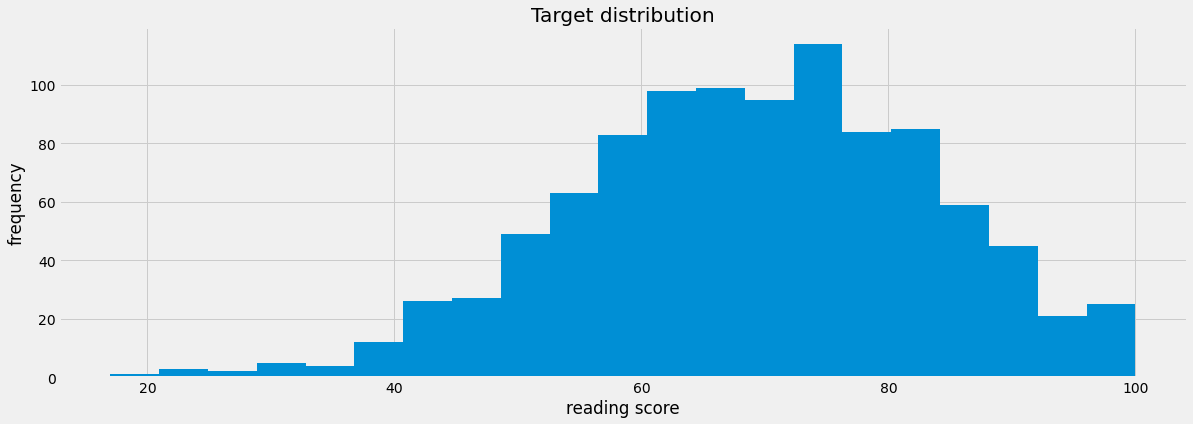

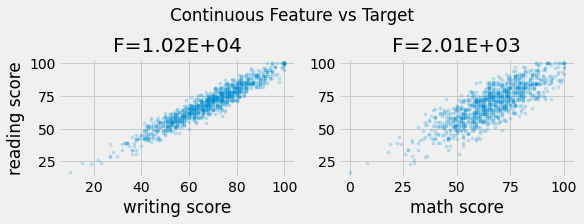

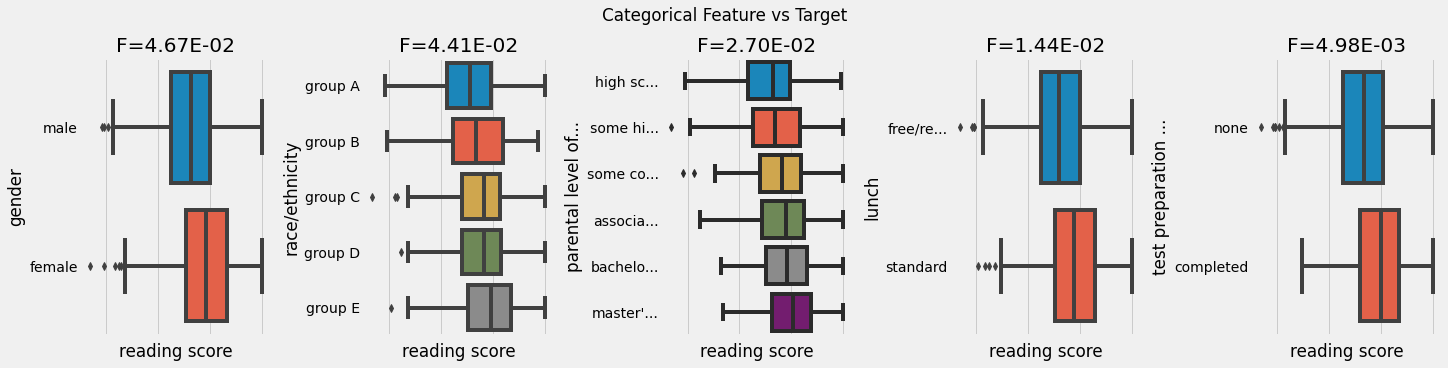

In [25]:
# Comparison of all other attributes with respect to Reading Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

Target looks like regression


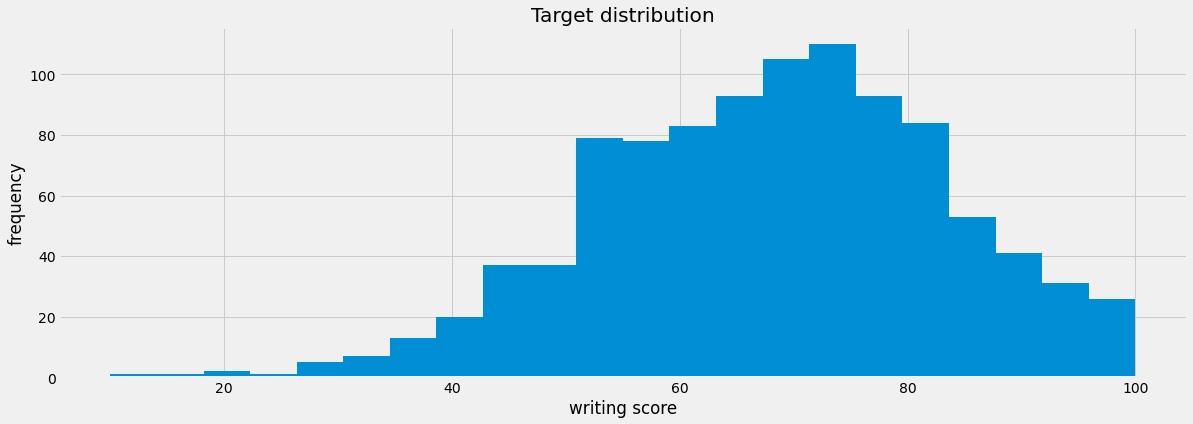

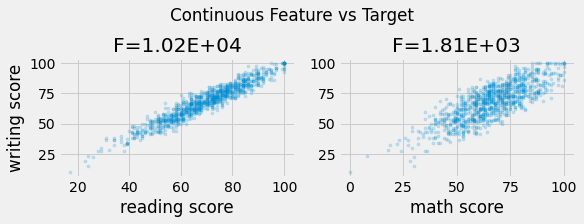

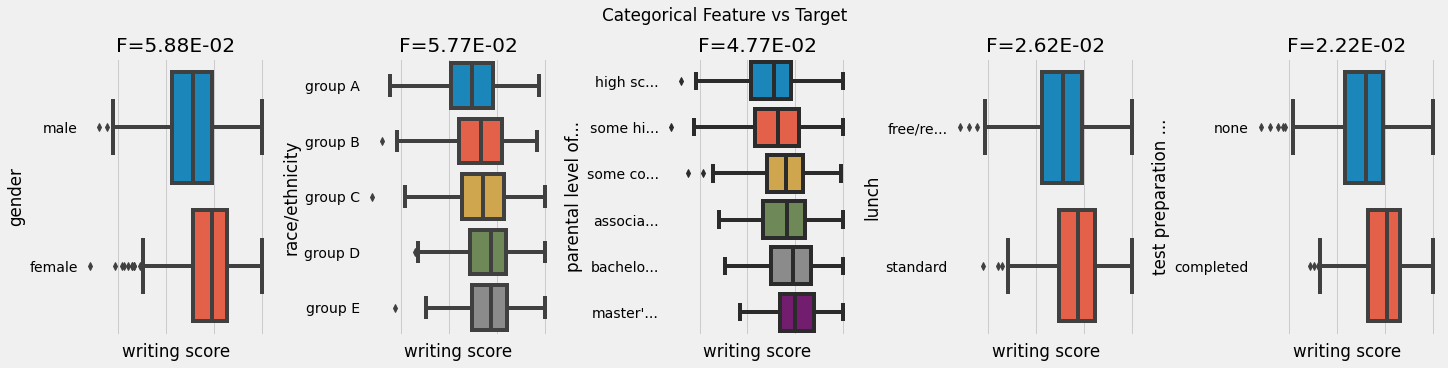

In [26]:
# Comparison of all other attributes with respect to Writing Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'writing score')

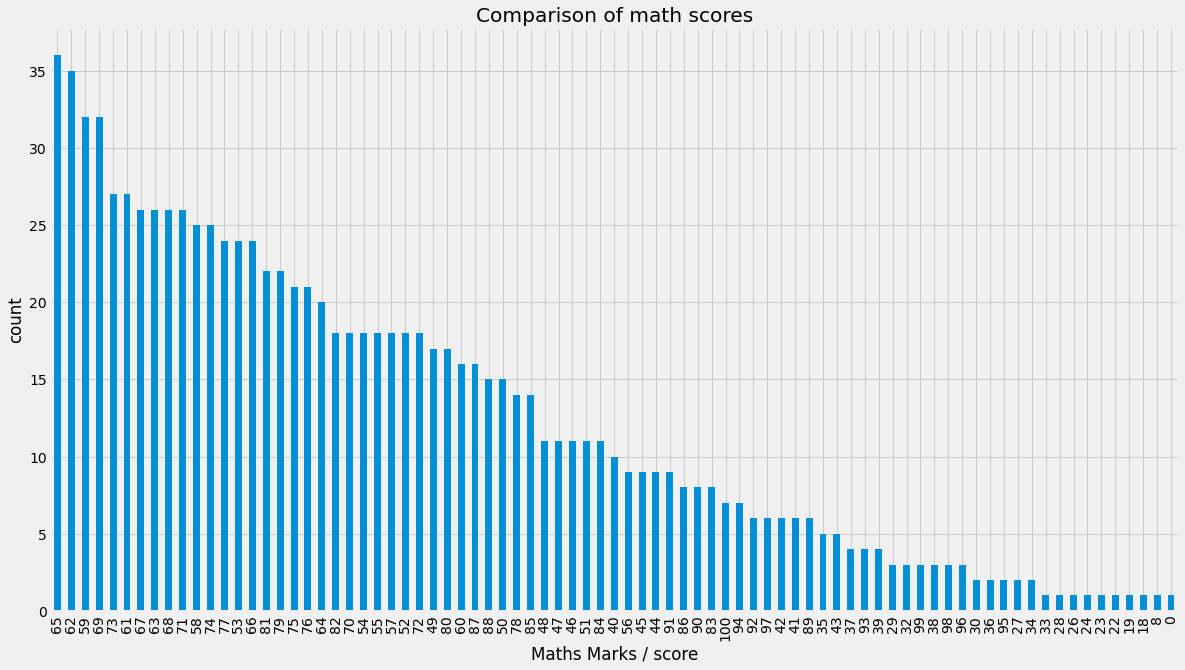

In [27]:
#Visualizing maths score
plt.subplots(figsize=(15,5))
data['math score'].value_counts(normalize = True)
data['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('Maths Marks / score')
plt.ylabel('count')
plt.show()

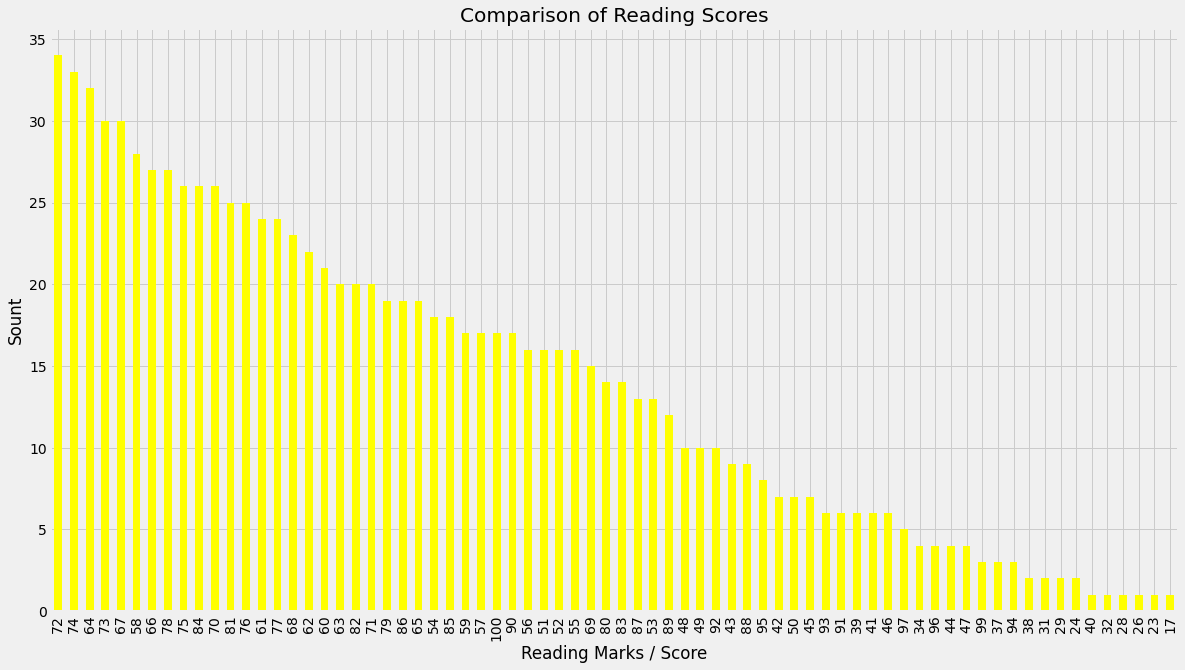

In [28]:
#Visualizing reading score score
plt.subplots(figsize=(15,5))
data['reading score'].value_counts(normalize = True)
data['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'yellow')
plt.title('Comparison of Reading Scores')
plt.xlabel('Reading Marks / Score')
plt.ylabel('Sount')
plt.show()

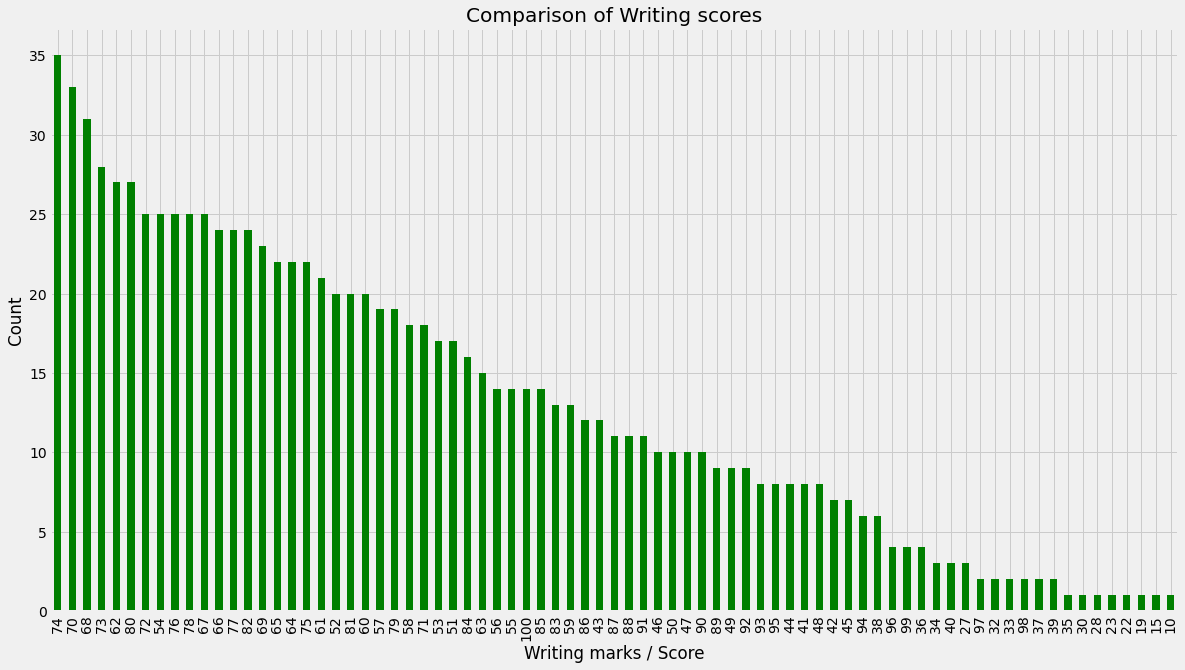

In [29]:
# visualizing writing score
plt.subplots(figsize=(15,5))
data['writing score'].value_counts(normalize = True)
data['writing score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'green')
plt.title('Comparison of Writing scores')
plt.xlabel('Writing marks / Score')
plt.ylabel('Count')
plt.show()

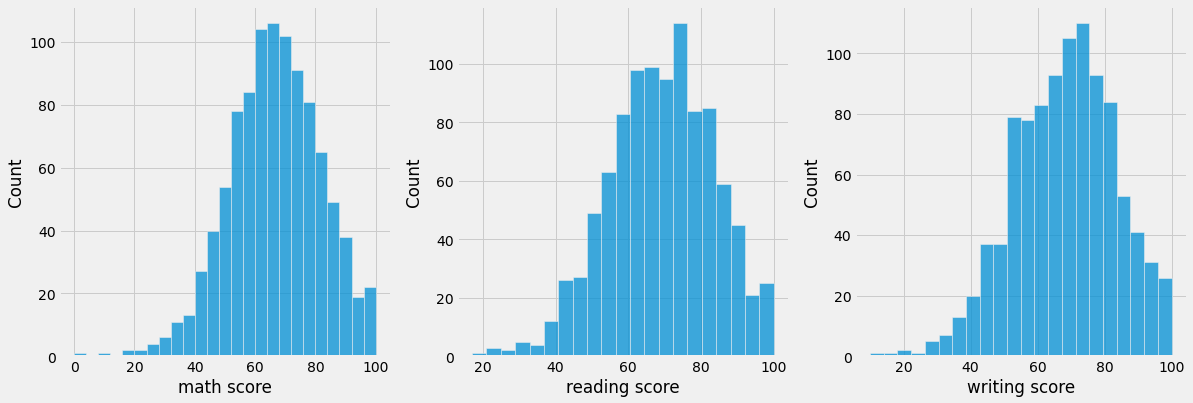

In [30]:
#Detecting Outliers
plt.subplot(1, 3, 1)
sns.histplot(data['math score'])

plt.subplot(1, 3, 2)
sns.histplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.histplot(data['writing score'])

plt.show()

In [31]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['math score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

students_score_more_than_50 = data[data['reading score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

students_score_more_than_50 = data[data['writing score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Maths : 85.0
Probability of Students Scoring more than 50 marks in Reading : 90.3
Probability of Students Scoring more than 50 marks in Writing : 87.6


In [32]:
#Lets also check the Probability of Students Passing in all the three Subjects
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) &
                                                  (data['writing score'] > 40) & 
                                                  (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


In [33]:
#Lets also check the Probability of Students Scoring more than 90 in all the three Subjects
total_students = data.shape[0]
number_of_students_scoring_more_than_90 = data[(data['math score'] > 90) &
                                                  (data['writing score'] > 90) & 
                                                  (data['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 2.30 %


In [34]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= data['math score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", data['math score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= data['reading score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", data['reading score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= data['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", data['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


In [35]:
#Let check the Confidence Interval for Math Score
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['math score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['math score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


In [36]:
#Let check the Confidence Interval for Reading Score
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['reading score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['reading score'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.75757337011645, 69.27642662988355)
True mean: 69.169


In [37]:
#Let check the Confidence Interval for Writing Score
#Lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['writing score'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

#Check the z-critical value  
print("z-critical value: ",z_critical)                                

#Get the population standard deviation
pop_stdev = data['writing score'].std()  

#Checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#Defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.59660035030862, 69.17739964969138)
True mean: 68.054


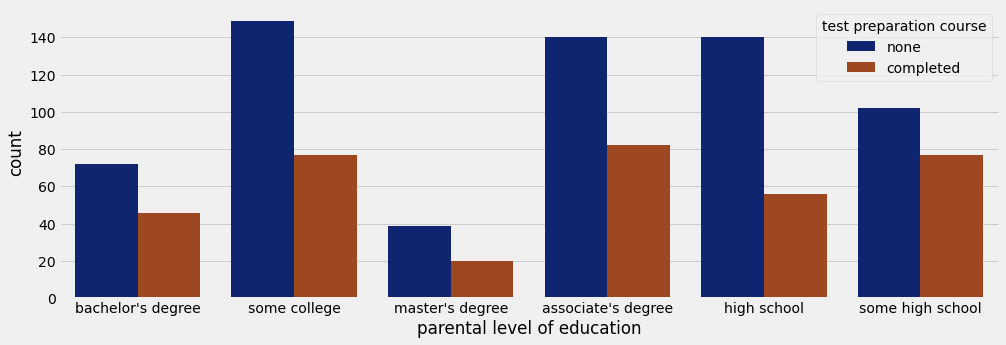

In [38]:
#Comparison of parental degree and test course
plt.subplots(figsize=(15,5))
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.show()

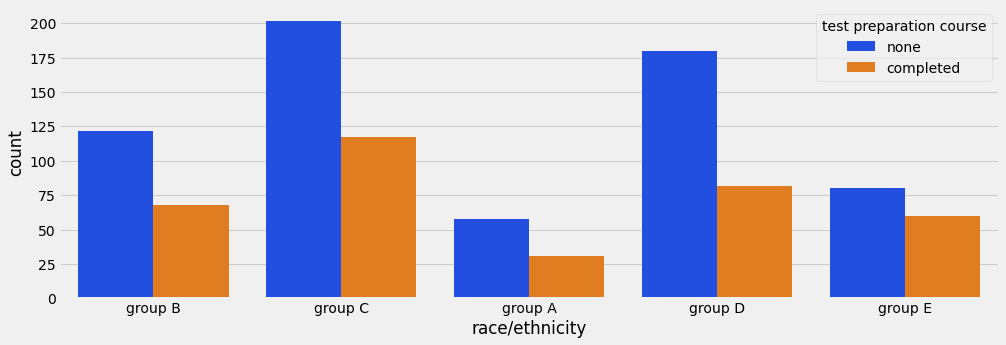

In [39]:
#Comparison of race/ethnicity and test preparation course
plt.subplots(figsize=(15,5))
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.show()

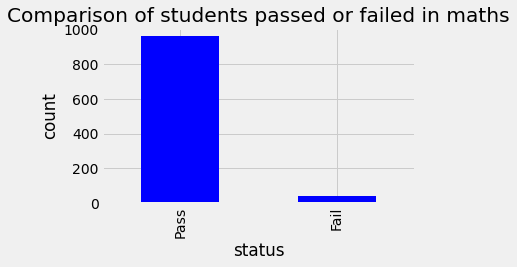

In [40]:
# feature engineering on the data to visualize and solve the dataset more accurately
# setting a passing mark for the students to pass on the three subjects individually
plt.subplots(figsize=(15,8))
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()


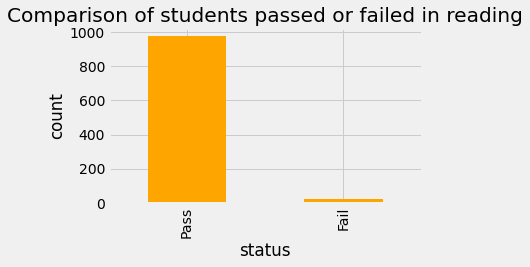

In [41]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.bar(color = 'orange', figsize = (5, 3))

plt.title('Comparison of students passed or failed in reading')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

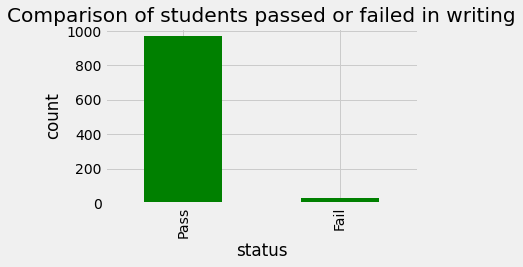

In [42]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.bar(color = 'green', figsize = (5, 3))

plt.title('Comparison of students passed or failed in writing')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

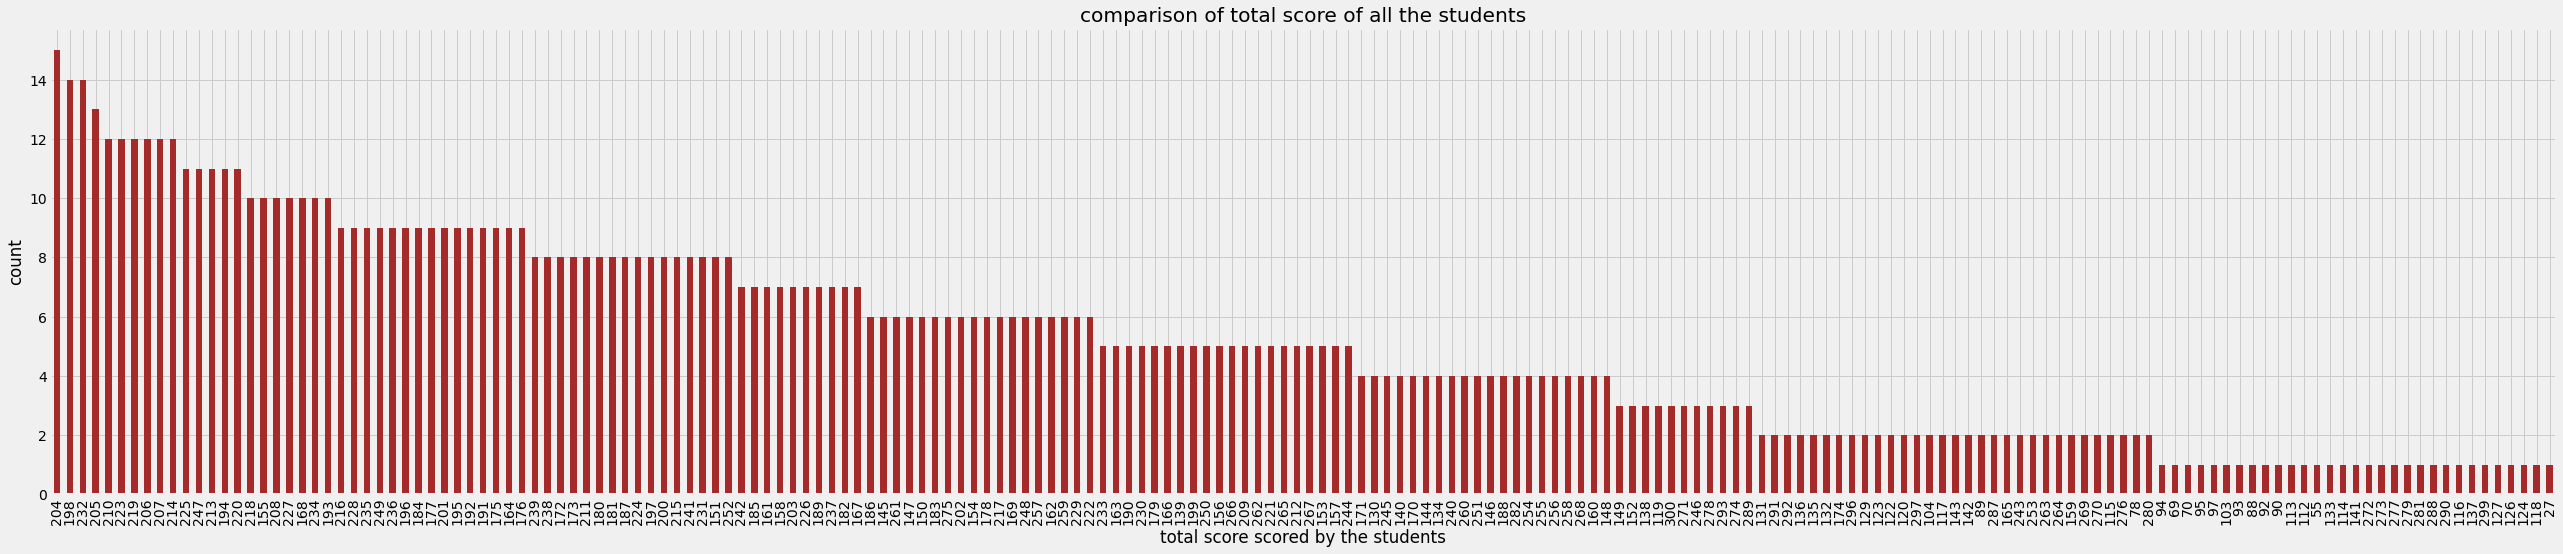

In [43]:
#Computing the total score for each student
plt.subplots(figsize=(15,8))
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

data['total_score'].value_counts(normalize = True)
data['total_score'].value_counts(dropna = True).plot.bar(color = 'brown', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



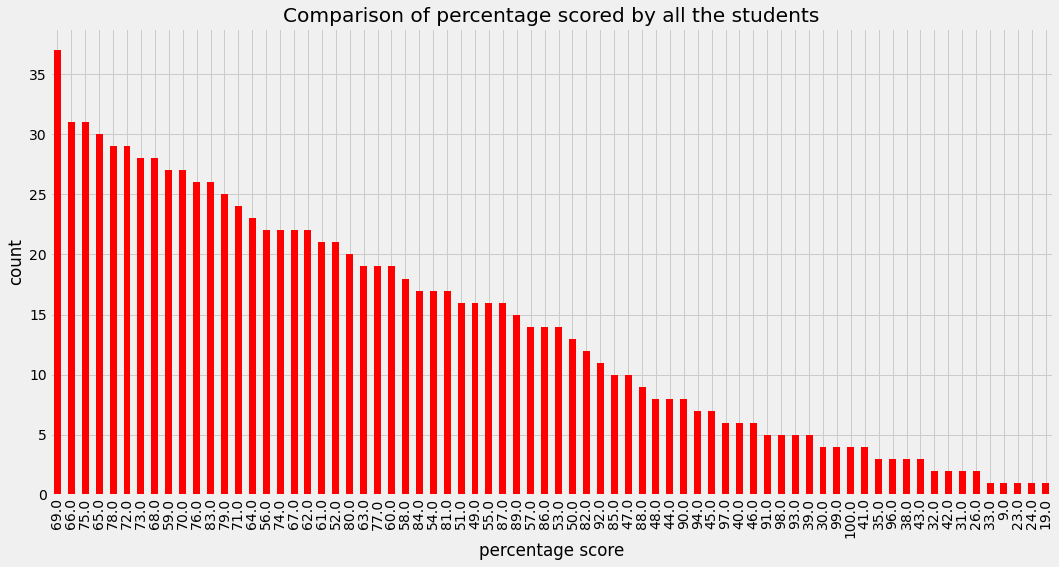

In [44]:
#Computing percentage for each of the students
#Importing math library to use ceil
from math import * 

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
  data['percentage'][i] = ceil(data['percentage'][i])

data['percentage'].value_counts(normalize = True)
data['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

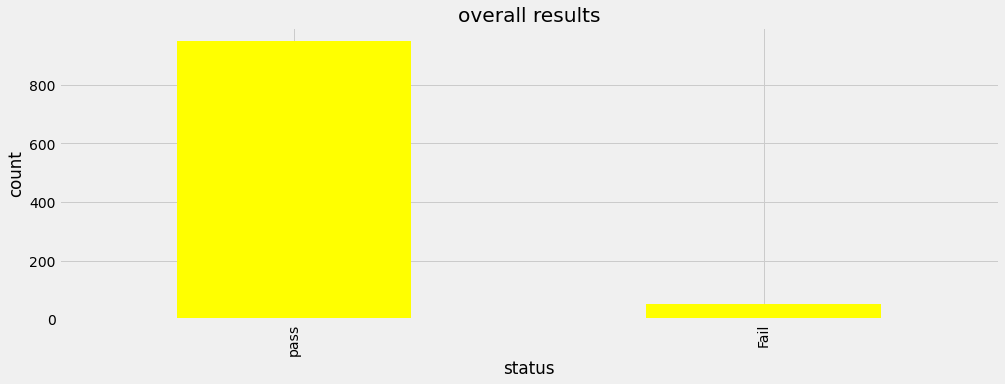

In [45]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.bar(color = 'yellow', figsize = (15, 5))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

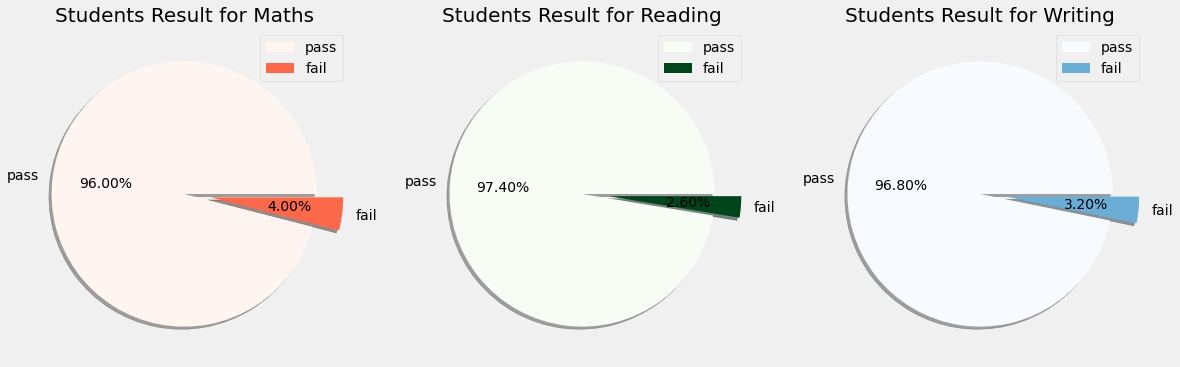

In [46]:
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (18, 12)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

In [47]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

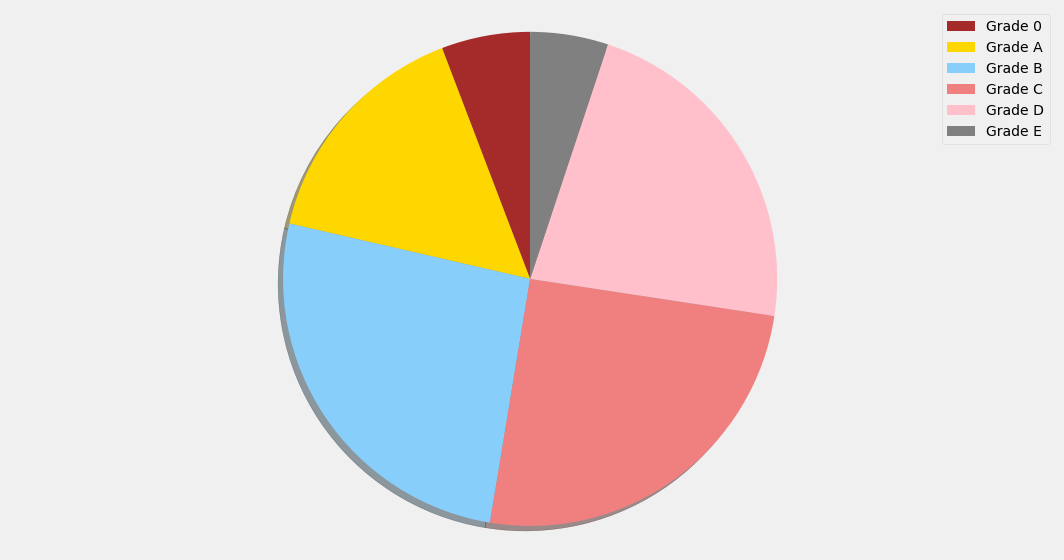

In [48]:
# plotting a pie chart for the distribution of various grades amongst the students


plt.subplots(figsize=(15,8))
labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['brown', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'gray']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

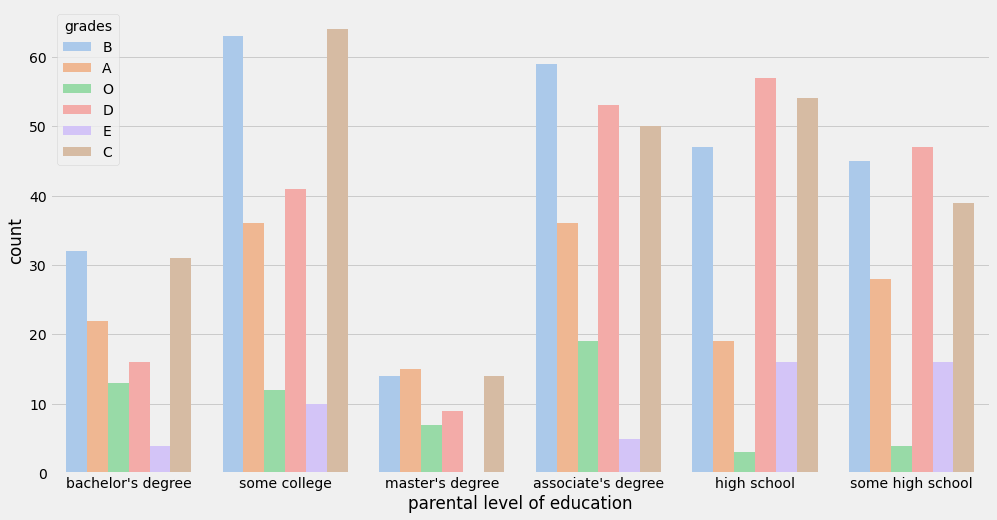

In [49]:
# for better visualization we will plot it again using seaborn
plt.subplots(figsize=(15,8))
sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.show()

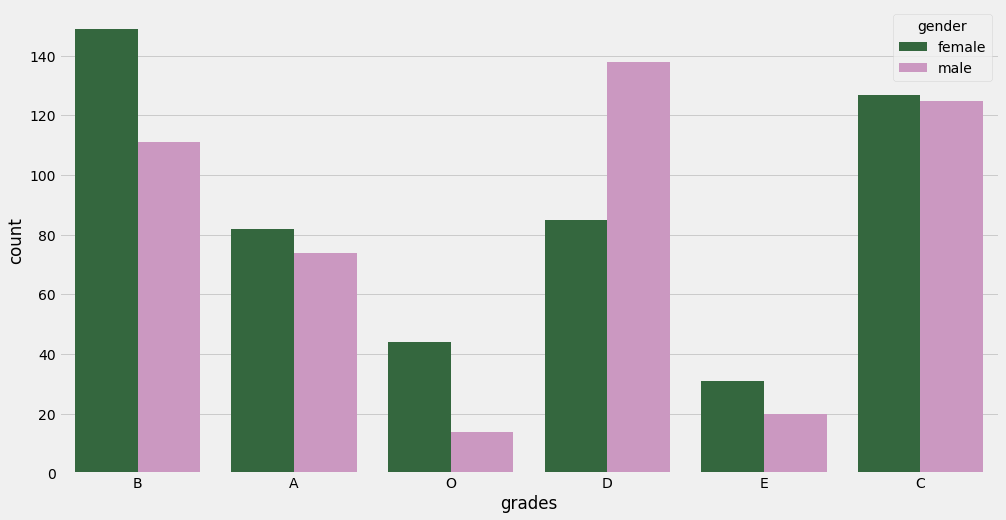

In [50]:
# comparing the distribution of grades among males and females
plt.subplots(figsize=(15,8))
sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

Text(0.5, 1.0, 'Correlations between the attributes')

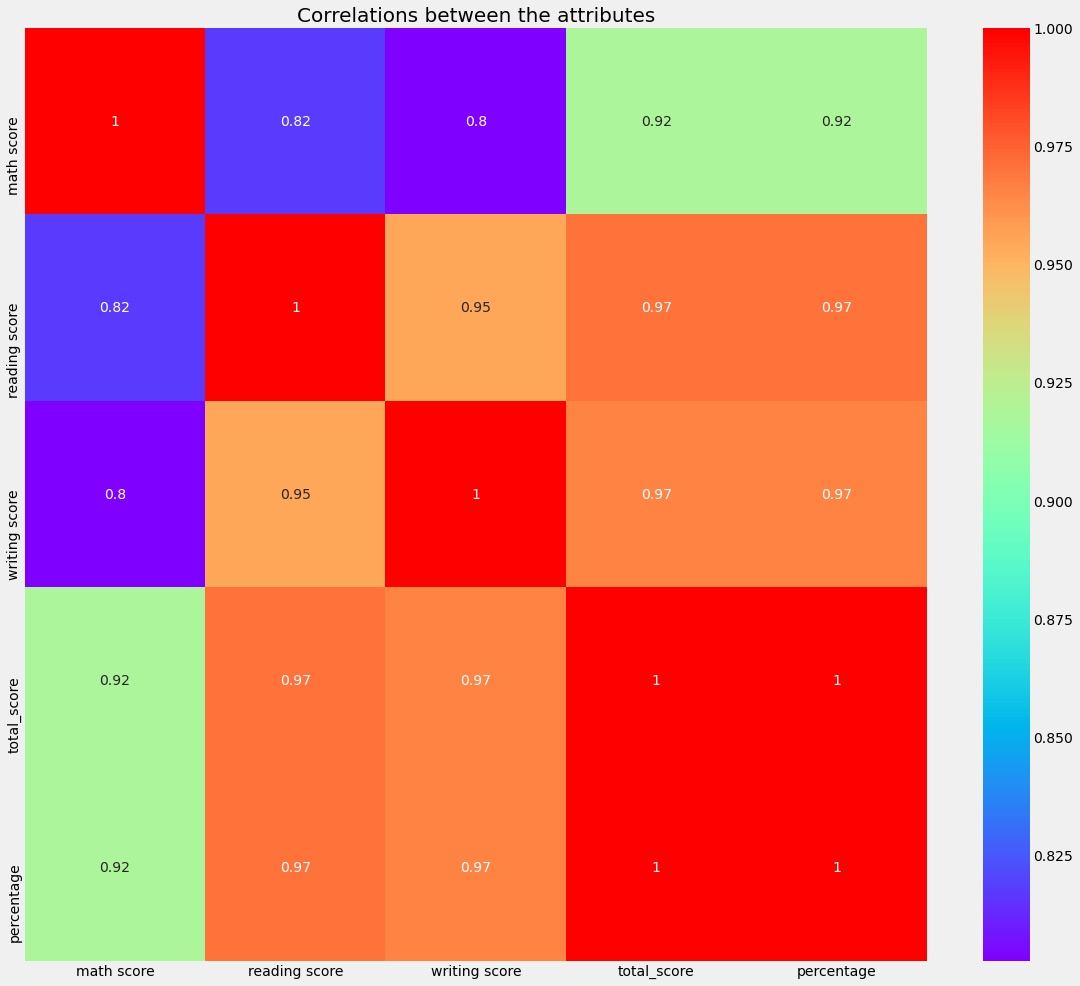

In [51]:
# heatmap

plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(data.corr(), cmap = 'rainbow', annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

In [52]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,pass,B


In [53]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch

data['lunch'] = le.fit_transform(data['lunch'])

In [54]:
# we have to map values to each of the categories

data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [55]:
# label encoding for parental level of education

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [56]:
# label encoding for gender

data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading

data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing

data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status

data['status'] = le.fit_transform(data['status'])


In [57]:
# label encoding for grades
# we have to map values to each of the categories

data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [58]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [59]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

#Creation of Train and Test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)
#Creation of Train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(560, 14)
(560,)
(300, 14)
(300,)


In [60]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [80]:
#Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
models = []
names = ['SVM','Random Forest','DecisionTreeClassifier']

# creating list of models
models.append(SVC())
models.append(RandomForestClassifier())
models.append(DecisionTreeClassifier())
for i in range(0,len(models)): 
  # feeding the training data to the model
  models[i].fit(x_train, y_train)

  # predicting the x-test results
  y_pred = models[i].predict(x_test)

  # calculating the accuracies
  print(names[i] +" training accuracy :", models[i].score(x_train, y_train))
  print(names[i] +" testing accuracy :", models[i].score(x_test, y_test))

SVM training accuracy : 0.9017857142857143
SVM testing accuracy : 0.84
Random Forest training accuracy : 1.0
Random Forest testing accuracy : 1.0
DecisionTreeClassifier training accuracy : 1.0
DecisionTreeClassifier testing accuracy : 1.0


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

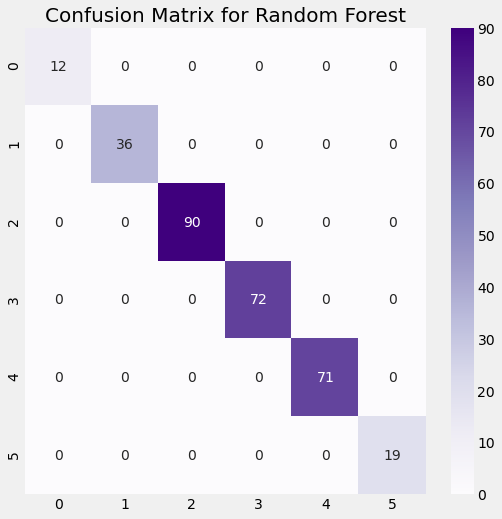

In [81]:
# printing the confusion matrix
plt.subplots(figsize=(8,8))
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)

In [82]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        19

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

